# ATTENTION IS ALL YOU NEED

## EMBEDDINGS

* humans are very good with texts , computers are very good with numbers, we need a way to bridge this gap , embeddings bridge this gap by converting string to numbers keeping semantic meanings intact
* embeddings are very important because the better the embeddings, the better the model will understand the relationship between the words and semantic meanings and hence better output
    * in embeddings , similar words or words which have similar semantic meaning, properties are placed closed to each other which means they have similar vector embeddings

##### in the below image , see how related words are placed close to each other, here we are having only two axes in our encoding but in reality we have multiple axes depending on the number of features on what basis we are forming the embeddings.
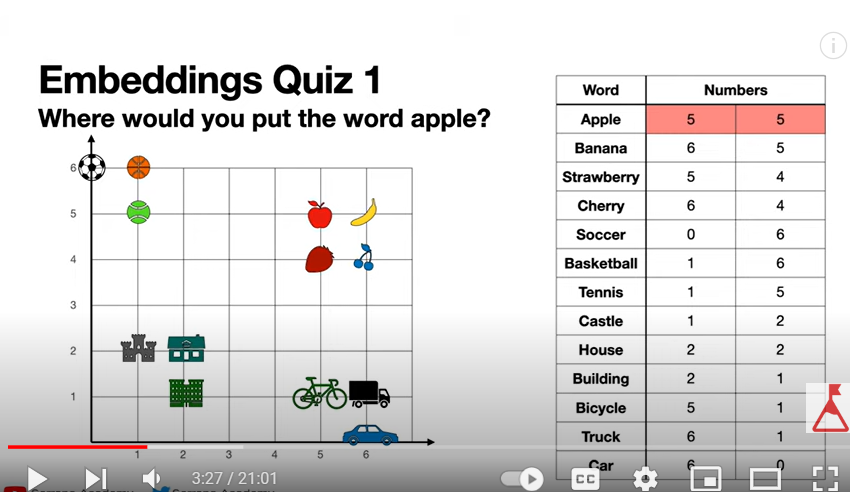

* the embeddings have around 4096 numbers instead of just x and y as shown in the above number
##### ISSUES
* let's suppose for simplicity we have two groups only electronic gadget and fruits, android,microsoft,samsung will be in one cluster, pineapple,pears,oranges are in other cluster, let's think now apple where we will place it ? because it is both a gadget and a fruit , to solve this issue self-attention comes into picture, to understand CONTEXT of the word

### ATTENTION
##### see below how the context changes the meaning of a word
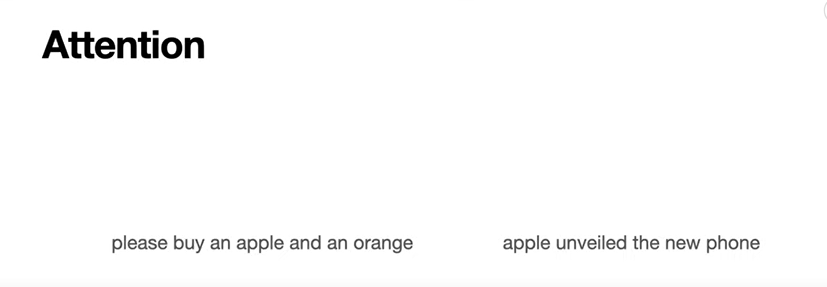

* the other word in the context help to clear the meaning of the ambiguous words and in the below image it is shown how a word with clear meaning help in deriving the meaning of ambiguous word
  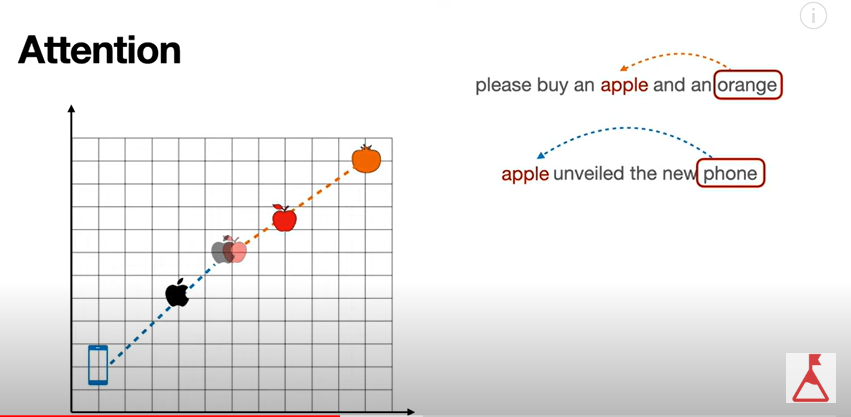

* it's not that only the oranges affect the meaning of word but all the other word in the context try to effect or help in deriving the meaning but since the apples are closer to oranges in the embedding they effect the meaning more
* here in the below image , below left corner, orange is orange in color, and apple is red in color
  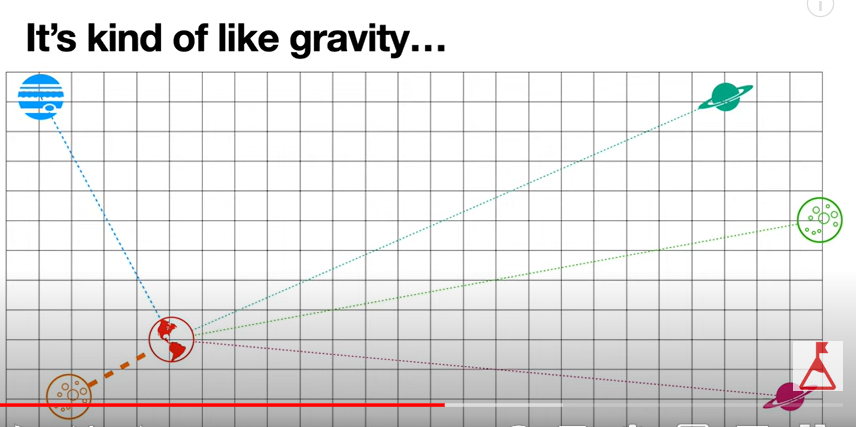
  

### MULTI-HEADED ATTENTION

* in attention we have just one embedding for a word and we tried to derive it's meaning from that embeddings, in multiheaded attention, we generate many embedding for given input by doing linear transformation. LINEAR TRANSFORMATION  are the operations we apply to inputs to transform them, linear transformation results like inlarging, skewing , rotating etc, in this way we get multiple embeddings. Now we give scores to these embeddings and then we take dot product product of these output and the result is much better output then a single attention output
  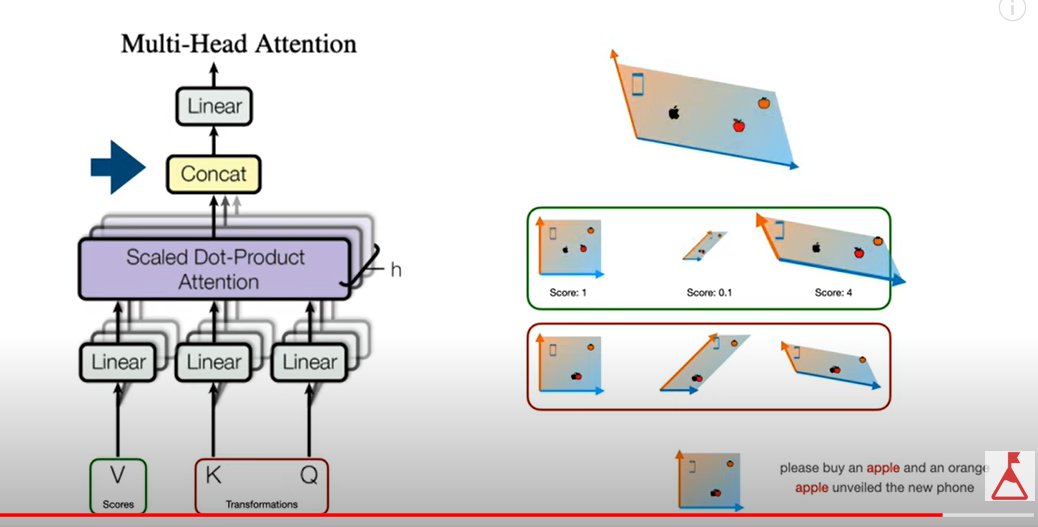

#### MATHEMATICS OF ATTENTION

##### SIMILARITY
* the gravitational pulling picture that we showed above how words pull each other closer to each other they use the concept of similarity which is done using DOT PRODUCT , and COSINE 

see in the below image , how when we are doing the dot product , the objects which are closer to each other their dot product comes out to be high but for distance ones the dot product comes out smaller

##### SIMILARITY MEASURE USING DOT PRODUCT
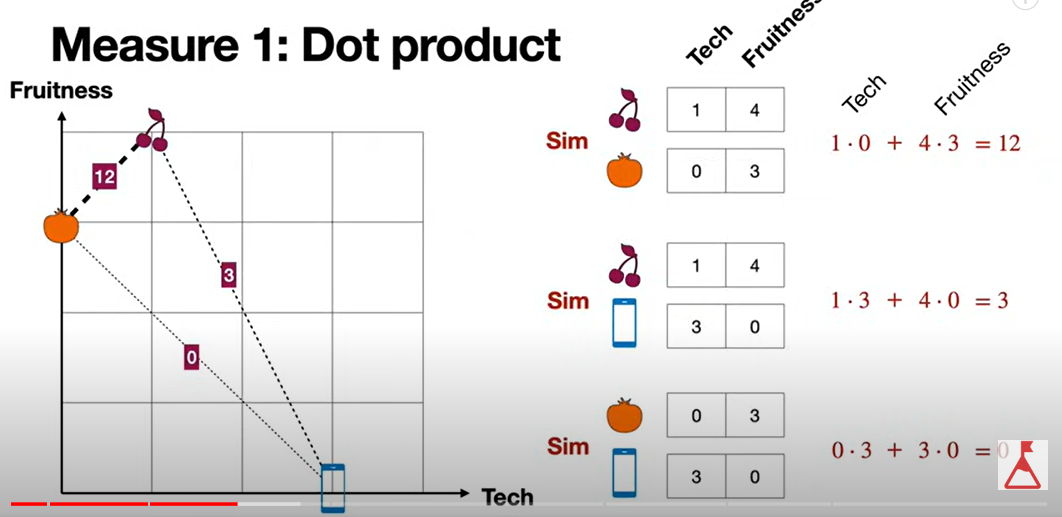

##### SIMILARITY MEASURE USING COSINE ANGLE
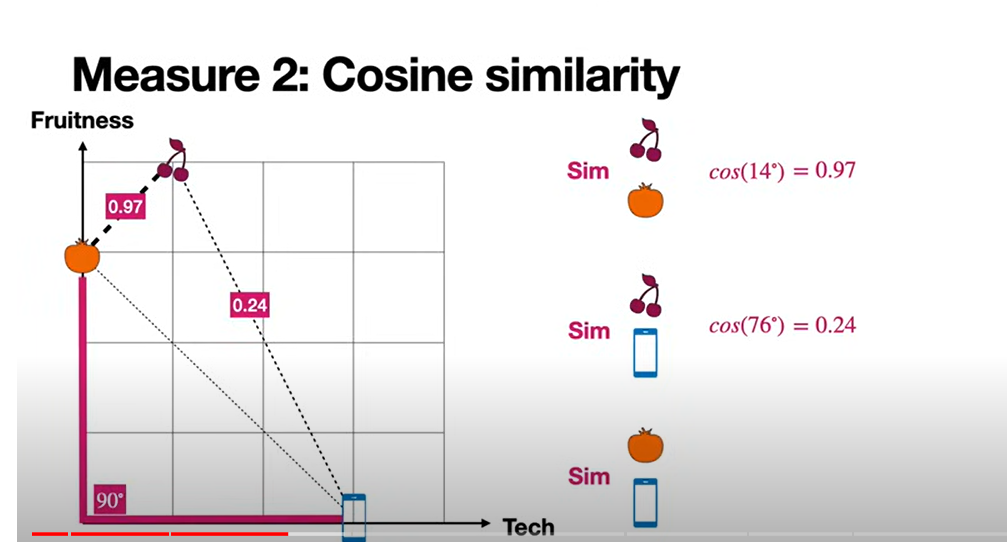

##### above are two ways but in attention we use a modification of the dot product, where we take the dot product and divide the value by the number of features or axes in the matrix.
* this is being done to bring the very large output to a certain range
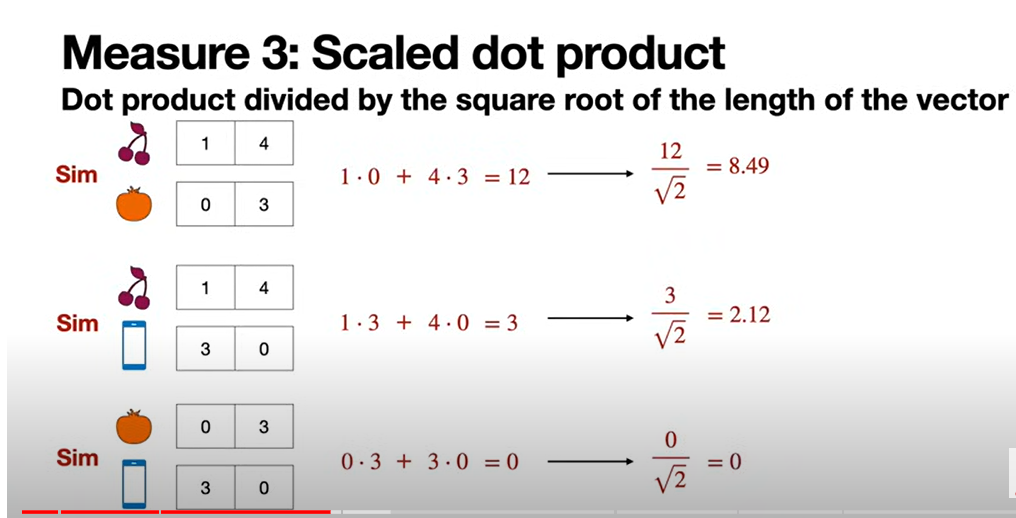

##### now let's see the working in our example
* we know that each word can affect the meaning of other words in the context, so let's calculate the relationship between the words by taking their cosine angels between them.
* let's supppose each words have 3 dimensions tech fruitness and other and then let's calculate the cosine the below table we are storing the consine values, the red table
  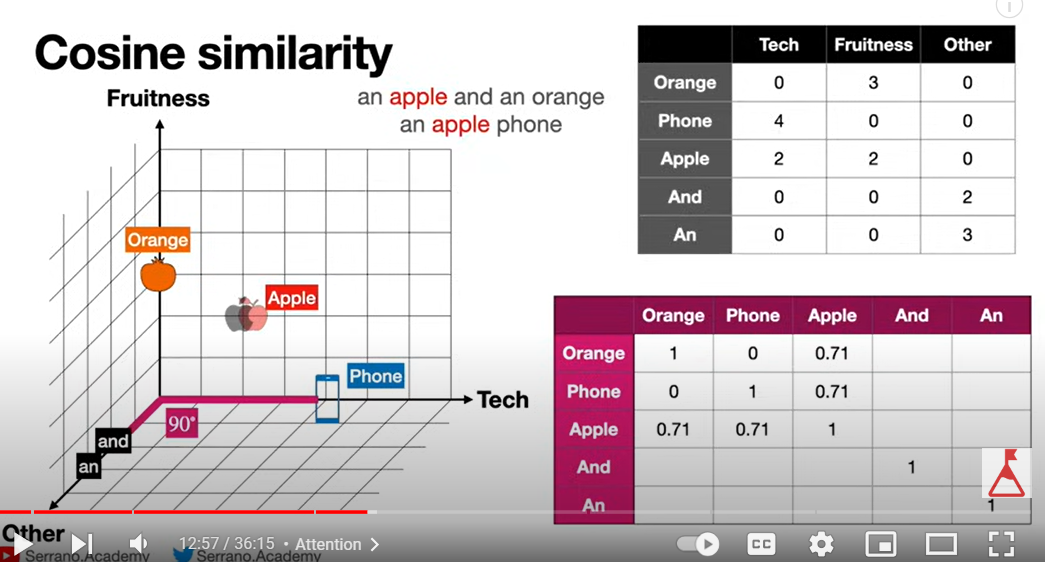

* now we will use these cosine values to move the word around i.e THE ATTENTION STEP.
* each row has realtionship of that word with other word , the orange has 1 times orange value, 0 times phone value , 0.71 times apple value and so on , i.e how much of a relationship a word has with other word , in below we are calculating the same
* here in below image we ar doing that GRAVITATIONAL PULL AKA ATTENTION STEP
  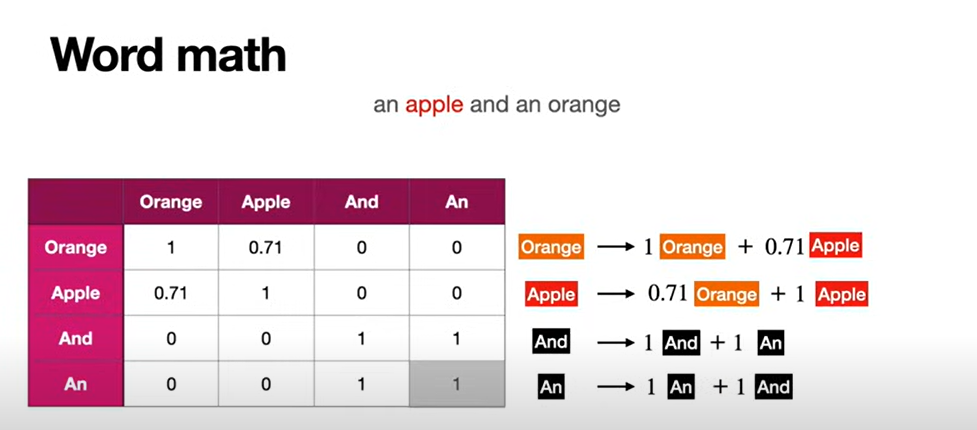

##### similarly if we do similar for other sentence we will get relationship between the words of that sentence 
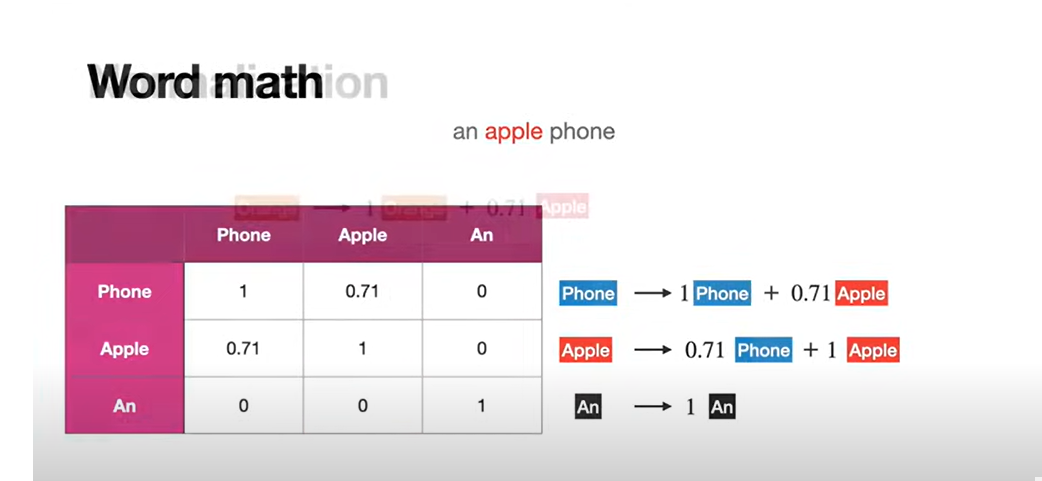

* the addition that we do , here the axes are small therefore the addition is very small value 1 + 0.71 and so on , but in real word this can be very huge so for that we need to do normalization and try to bring these sum value = 1 i.e 1 + 0.71 which is exceeding 1 we can bring to 1 . we can do that by dividing with sum of 1+ 0.71 in above example eg.
  1/(1+0.71) , 0.71 / (1 + 0.71) but it will be a issue if the attention equation comes out in negative terms eg. 1phone - 1 apple  then we will have to divide by 1-1 i.e by 0 which is very bad and we should never divide by zero , so solve this issue, we take e^x  to do it it will scale between 0 and 1 and it won't suffer from the issue of divide by zero and we won't have any such issue. THIS step is called SOFTMAX
##### this below which was causing issue in second part of the first image
  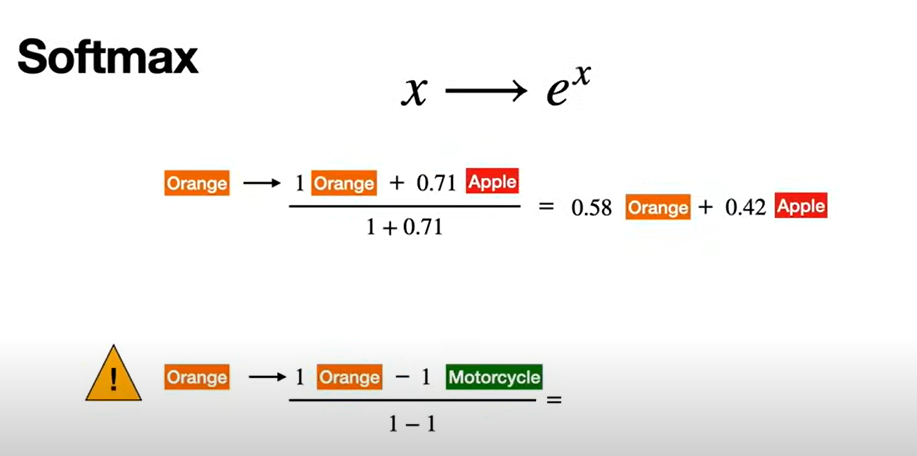

##### will become using the e^x solution to solve the issue
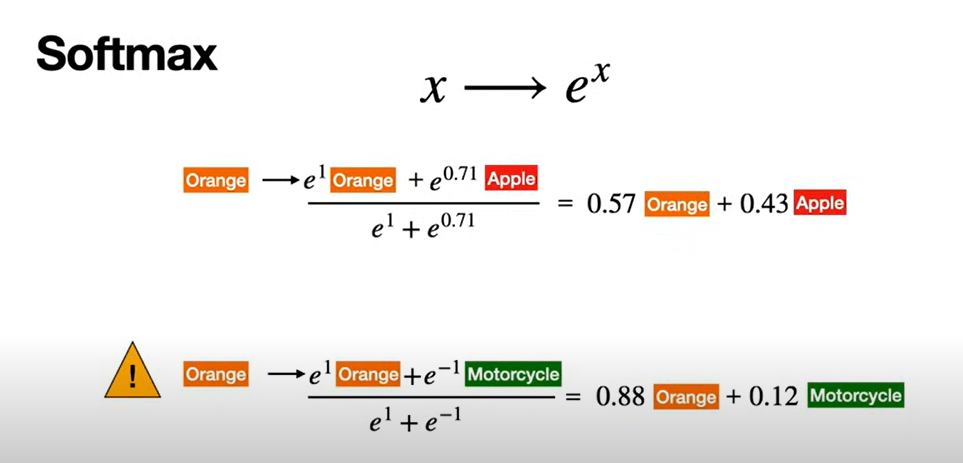


* these final values of equations that we got by doing softmax are defining that gravitational pull
* Now the gravitational pull we talked about got in mathematical terms and see how the movements are apple is saying we are moving 43% percent towards the orange in the first equation, according to the context
* in second equation we are saying apple is being moved 43% towards the phone, according to the context
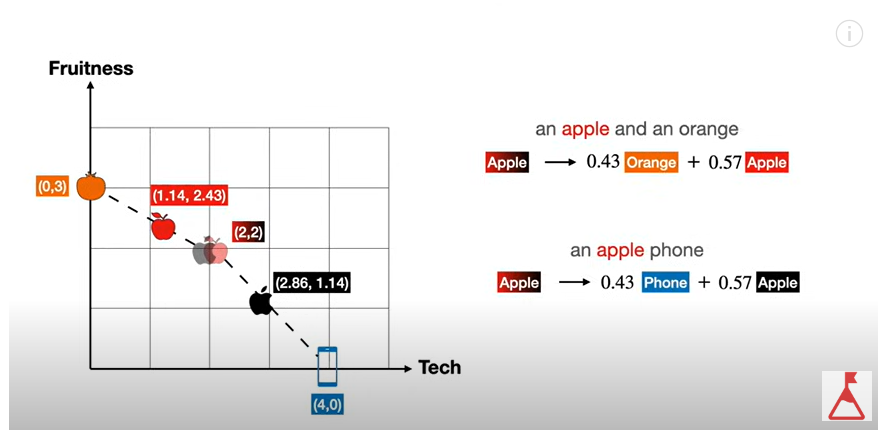

#### KEYS AND QUERIES , 
 * in the above we did normal transformation in single plane, we have keys and queries which are predefined vector which before we do the dot products, we multiply keys with one suppose we multiply apple with keys and orange with queries , what this mutliplication gives us is the linear transformation which improves the result.

##### GETTING NEW EMBEDDING FROM THE EXISTINGS ONES, THE KEYS AND QUERIES HELP IN DOING THE BELOW TRANSFORMATIONS
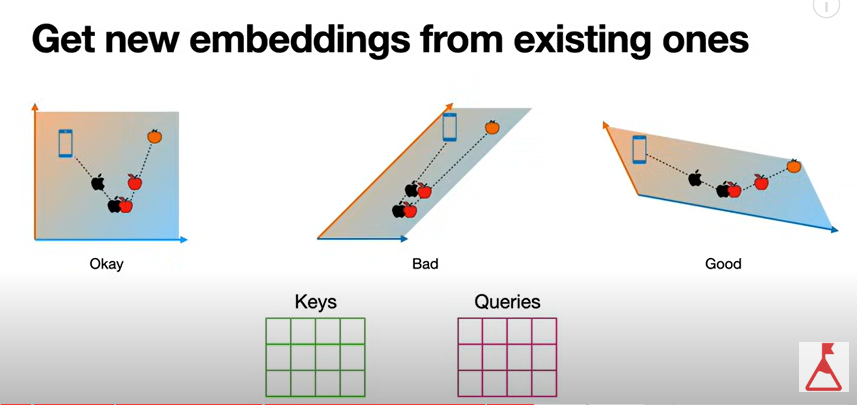

##### WITHOUT TRANSFORMATION WE DID LIKE THIS
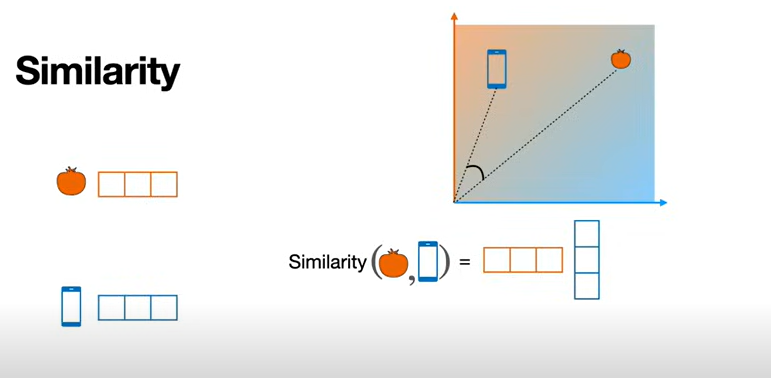
##### WITH USING THE KEYS AND QUERIES WHICH RESULT IN THE LINEAR TRANSFORMATION
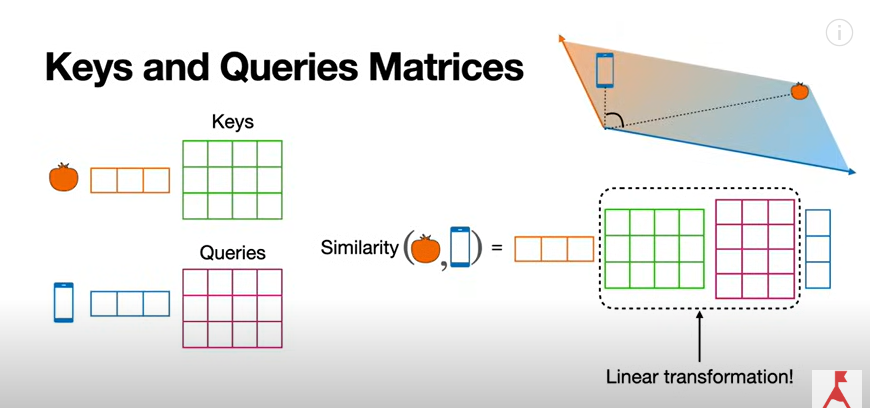


##### SO THE NORMAL WHICH WAS DONE IN FIRST PART IS TRANSFORMED INTO SECOND PART IMAGE USING KEYS AND QUERIES
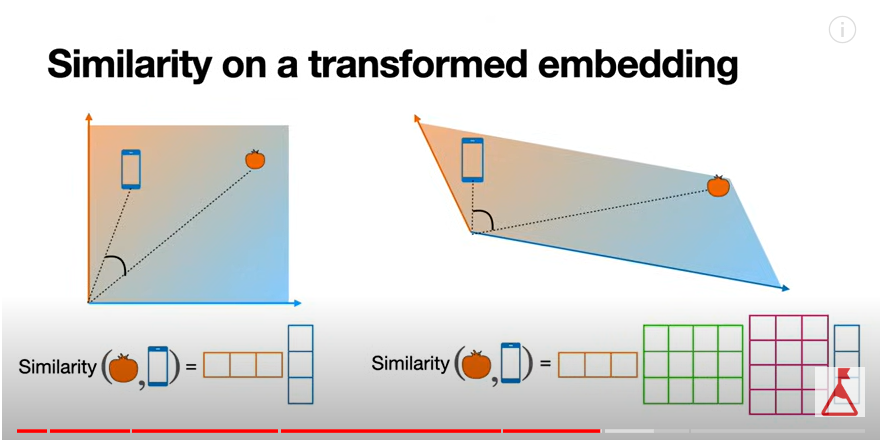

#### VALUE MATRIX
* we got the best martix which determine the feature of the words using the keys and queries matrices, now for getting the best next word which is main aim of the transformer we multiply the matrix output of keys, queries transformation with the value matrix as shown the below image
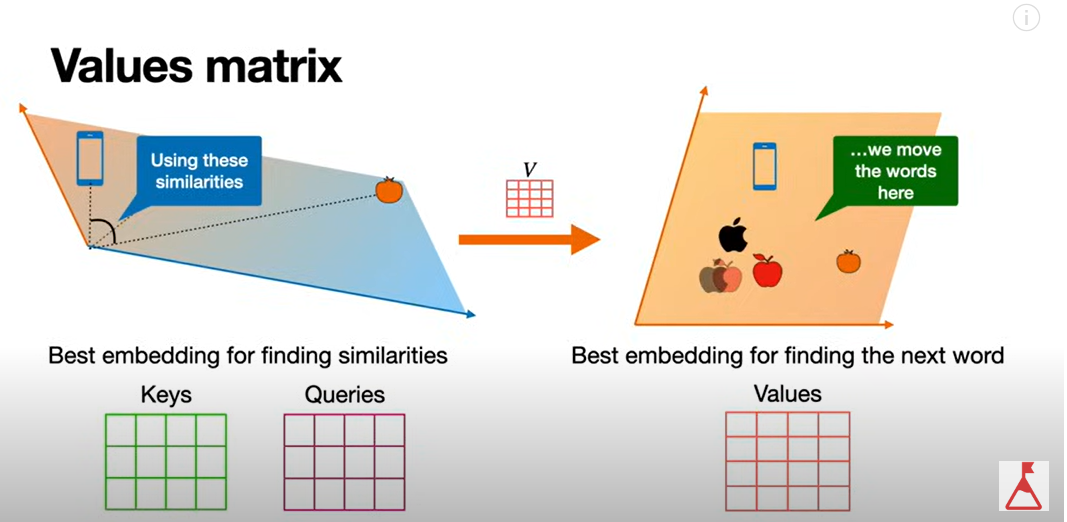

##### in the below image it is shown how the transformation happen first matrix is the result of keys , queries dot product operation on the input 
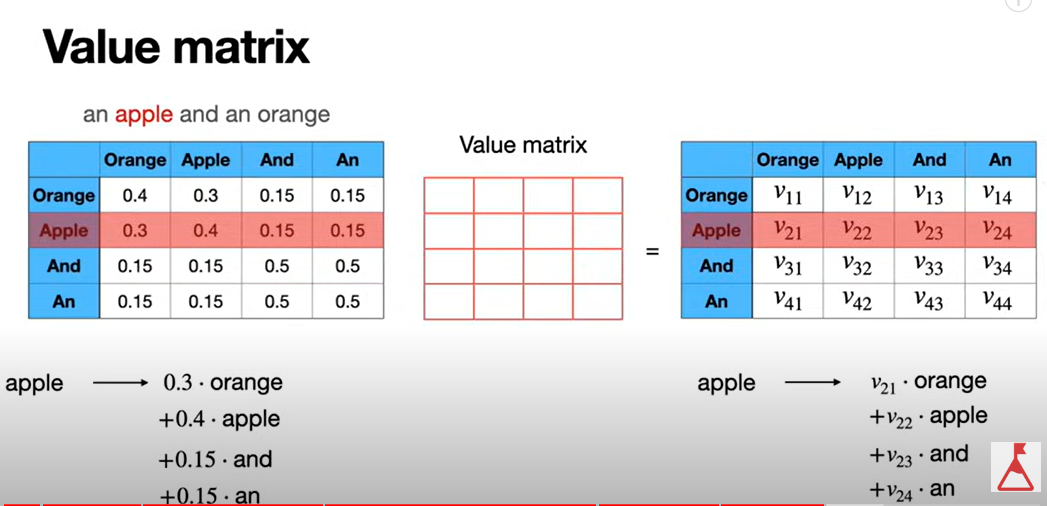

##### in the below image it is shown what are uses of each resultant matrix, result of key and queries operation result and then mutliplying that result with values matrix
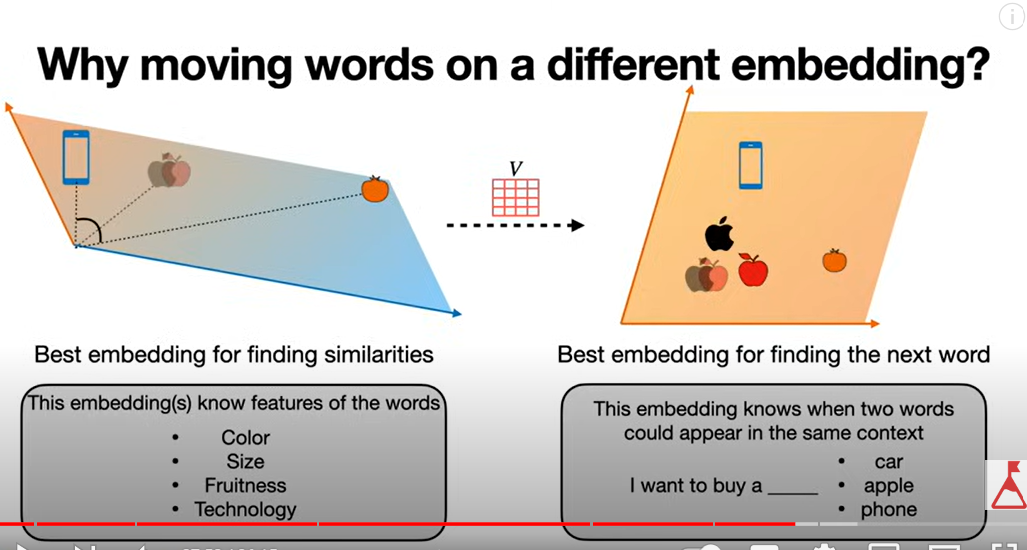

#### so the entire process looks something like this
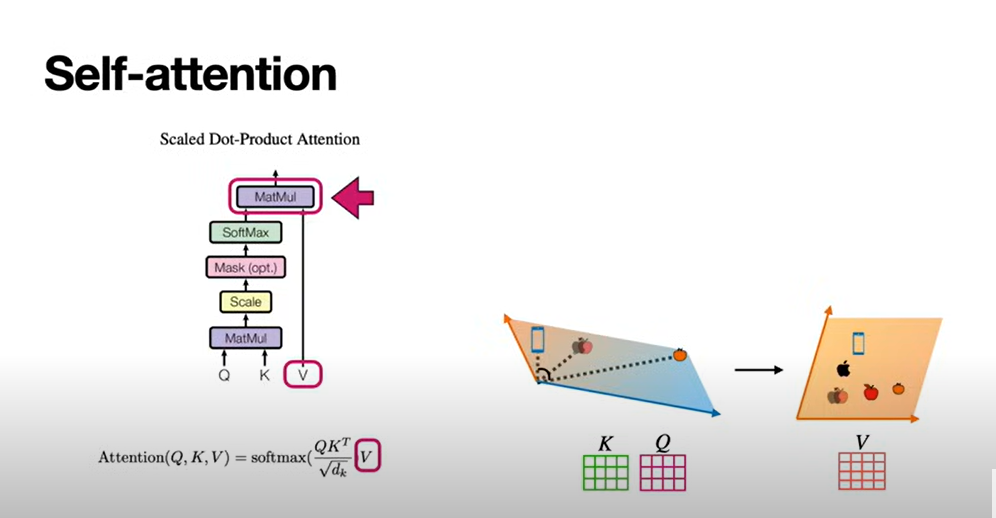

#### multi headed attention, 
* the same thing it's just we get mutliple linear transformed matrix some might be good some might be bad and we do mutliplication with values matrix and we get mutliple output for predicting the next word, then we don't discard the bad ones or anyting , we simply concatinate them and then we do linear transformation which marks the next tokens which are having less importance and which have more
  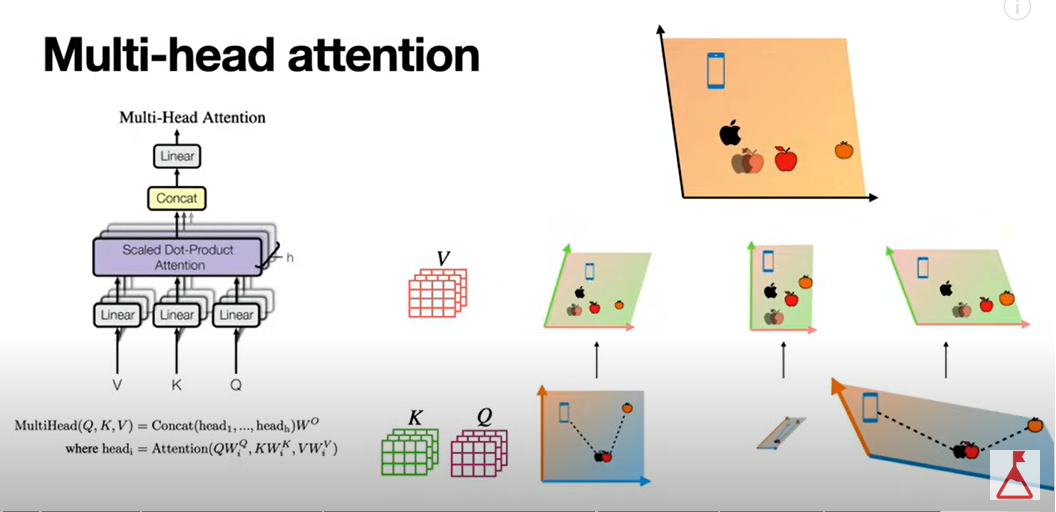

# TRANSFORMERS

transformer is basically next token output model, suppose we say write a story , it will give output "write a story once " , this will be further used to predict the next token which will be give "write a story once upon" and this will be further fed to give "write a story once upon a" and it keeps on going for the amout of words we need

* so simple diagram of transformer looks something like below
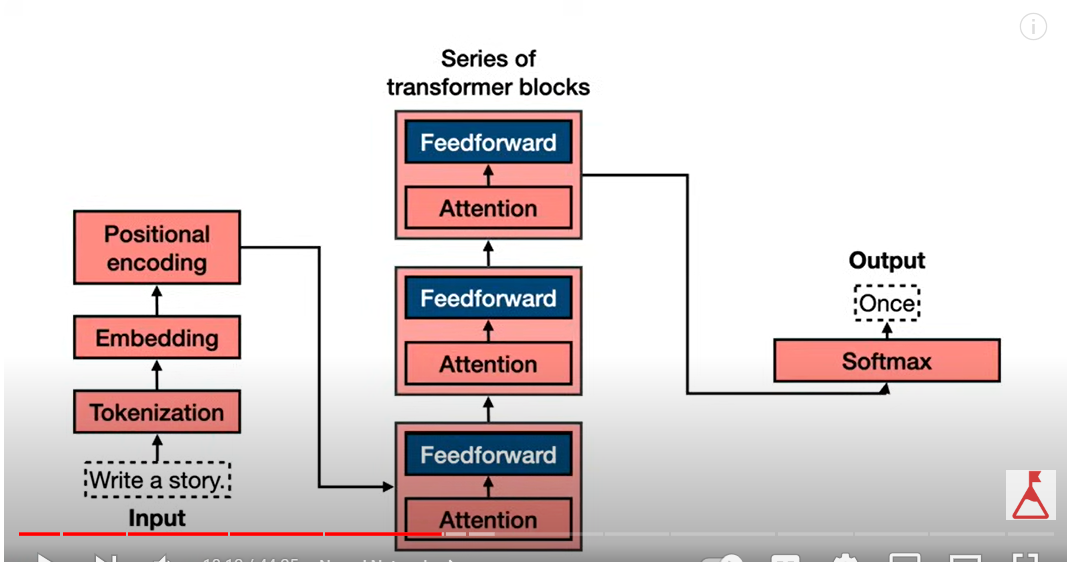

* FEEDFORWARD(other name for ANN or artificial neural network): it is simple neural network, which takes multiple input here in this case and output the next token

##### parts of a transformer
1. TOKENIZATION: the input text is broken down into tokens
2. EMBEDDINGS: convert the text into numbers vectors
3. POSITIONAL ENCODING: gives positions to the input's word and it helps to move the word around
4. ATTENTION: is everything we learned before the transformer heading in this notebook
5. FEEDFORWARD: normal neurons
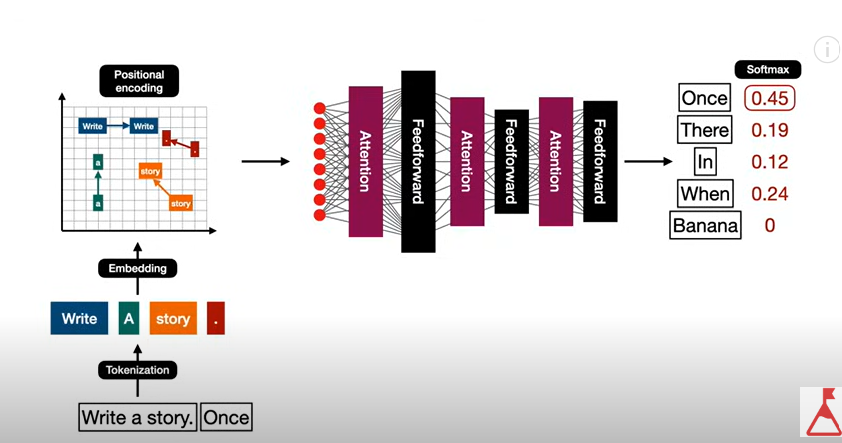